In [1]:
# 기본적으로 사용하는 라이브러리
import pandas as pd 
import numpy as np
import seaborn as sns
palette = sns.color_palette("husl", 9)
import matplotlib.pyplot as plt

# VIF을 위한 라이브러리
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# 정규화, PCA 라이브러리
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 모델 라이브러리
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# 통계 라이브러리
from scipy.stats import chi2

# 통계 시각화
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from matplotlib.gridspec import GridSpec

In [2]:
df = pd.read_csv('Customer Churn.csv')

In [3]:
# 데이터 확인

df.head(5)

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0


In [4]:
# 데이터 모양 확인

df.shape

(3150, 14)

In [5]:
# 데이터 정보 확인

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call  Failure            3150 non-null   int64  
 1   Complains                3150 non-null   int64  
 2   Subscription  Length     3150 non-null   int64  
 3   Charge  Amount           3150 non-null   int64  
 4   Seconds of Use           3150 non-null   int64  
 5   Frequency of use         3150 non-null   int64  
 6   Frequency of SMS         3150 non-null   int64  
 7   Distinct Called Numbers  3150 non-null   int64  
 8   Age Group                3150 non-null   int64  
 9   Tariff Plan              3150 non-null   int64  
 10  Status                   3150 non-null   int64  
 11  Age                      3150 non-null   int64  
 12  Customer Value           3150 non-null   float64
 13  Churn                    3150 non-null   int64  
dtypes: float64(1), int64(13)

In [6]:
# 띄어쓰기가 2번 된 columns 1번으로 수정

df.columns = df.columns.str.replace("  ", " ")

In [7]:
# 결측치 없는지 최종 확인

df.isnull().sum()

Call Failure               0
Complains                  0
Subscription Length        0
Charge Amount              0
Seconds of Use             0
Frequency of use           0
Frequency of SMS           0
Distinct Called Numbers    0
Age Group                  0
Tariff Plan                0
Status                     0
Age                        0
Customer Value             0
Churn                      0
dtype: int64

In [8]:
# 데이터 통계량 확인 - Charge Amount 확인 필수 (max 10 불가)

df.describe()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
count,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000
mean,7.627937,0.076508,32.541905,0.942857,4472.459683,69.460635,73.174921,23.509841,2.826032,1.077778,1.248254,30.998413,470.972916,0.157143
std,7.263886,0.265851,8.573482,1.521072,4197.908687,57.413308,112.237560,17.217337,0.892555,0.267864,0.432069,8.831095,517.015433,0.363993
min,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,15.000000,0.000000,0.000000
25%,1.000000,0.000000,30.000000,0.000000,1391.250000,27.000000,6.000000,10.000000,2.000000,1.000000,1.000000,25.000000,113.801250,0.000000
50%,6.000000,0.000000,35.000000,0.000000,2990.000000,54.000000,21.000000,21.000000,3.000000,1.000000,1.000000,30.000000,228.480000,0.000000
75%,12.000000,0.000000,38.000000,1.000000,6478.250000,95.000000,87.000000,34.000000,3.000000,1.000000,1.000000,30.000000,788.388750,0.000000
max,36.000000,1.000000,47.000000,10.000000,17090.000000,255.000000,522.000000,97.000000,5.000000,2.000000,2.000000,55.000000,2165.280000,1.000000


In [9]:
# Charge Amount 이상치 제거

out_Charge = df[df['Charge Amount'] == 10]

for index, value in out_Charge.iterrows():
    print(f" Index : {index}, Value: {value['Charge Amount']}")
    df.drop([index], axis=0, inplace=True)

 Index : 473, Value: 10.0
 Index : 2173, Value: 10.0
 Index : 2273, Value: 10.0
 Index : 2373, Value: 10.0
 Index : 2673, Value: 10.0
 Index : 2923, Value: 10.0
 Index : 2973, Value: 10.0


In [10]:
# 제거 확인

df.shape

(3143, 14)

In [11]:
# 다시 연속적인 인덱스 생성

df.reset_index(drop=True, inplace=True)

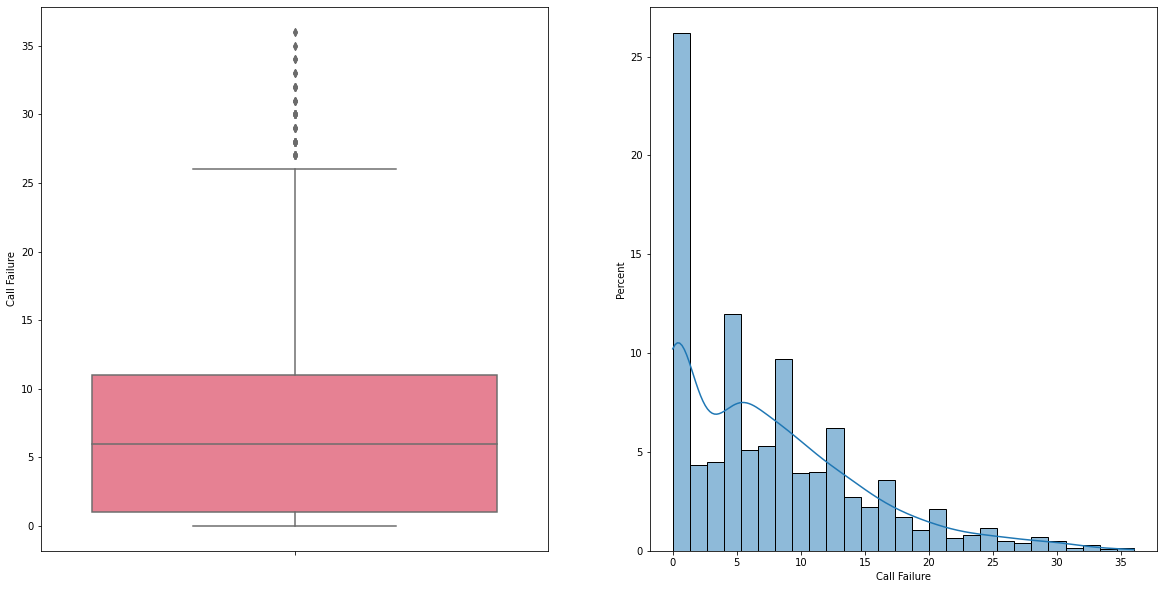

In [12]:
# Call failure 시각화 (numerical)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
sns.boxplot(y = df['Call Failure'], ax=axs[0], palette = palette)
sns.histplot(df['Call Failure'], kde = True, stat = 'percent', ax=axs[1], palette = palette)
plt.show()

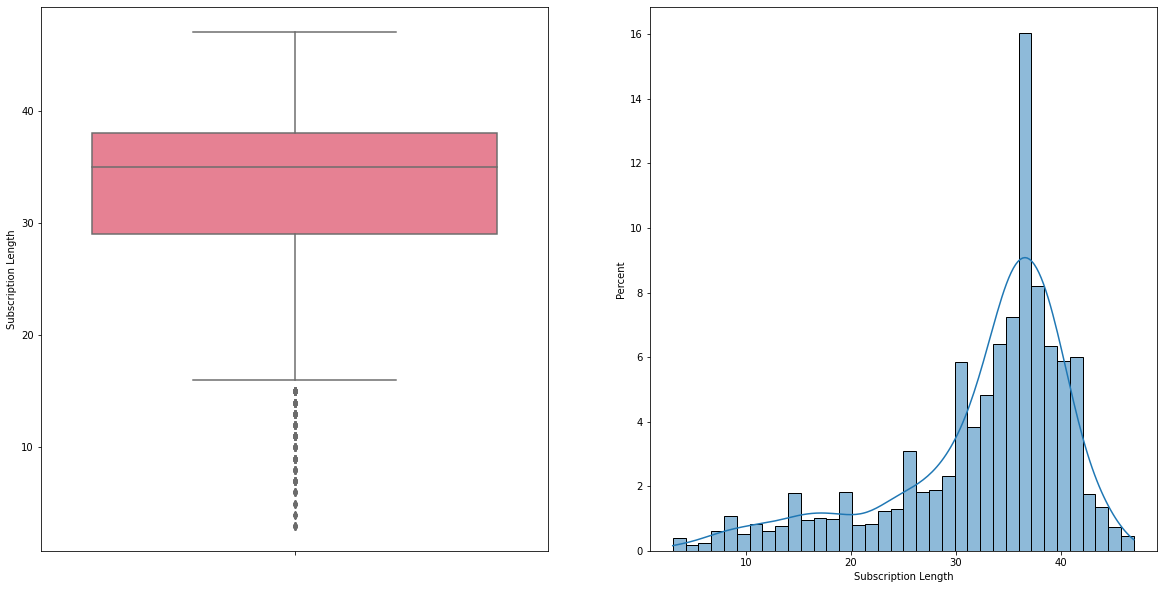

In [13]:
# Subscription length 시각화 (numerical)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
sns.boxplot(y = df['Subscription Length'], ax=axs[0], palette = palette)
sns.histplot(df['Subscription Length'], kde = True, stat = 'percent', ax=axs[1], palette = palette)
plt.show()

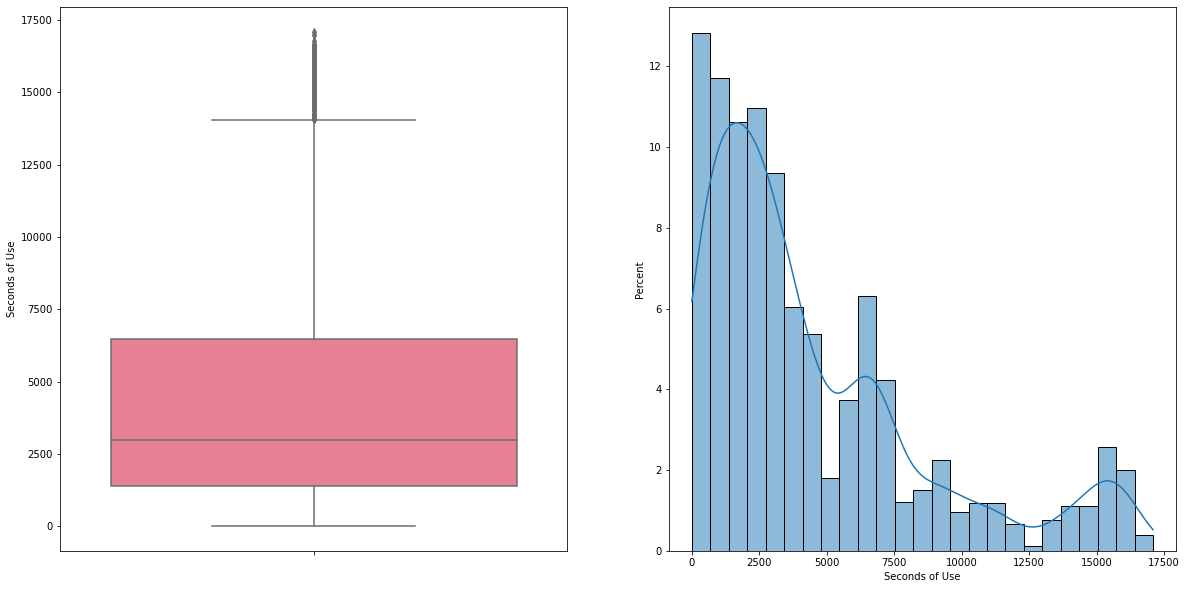

In [14]:
# Seconds of Use 시각화 (numerical)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
sns.boxplot(y = df['Seconds of Use'], ax=axs[0], palette = palette)
sns.histplot(df['Seconds of Use'], kde = True, stat = 'percent', ax=axs[1], palette = palette)
plt.show()

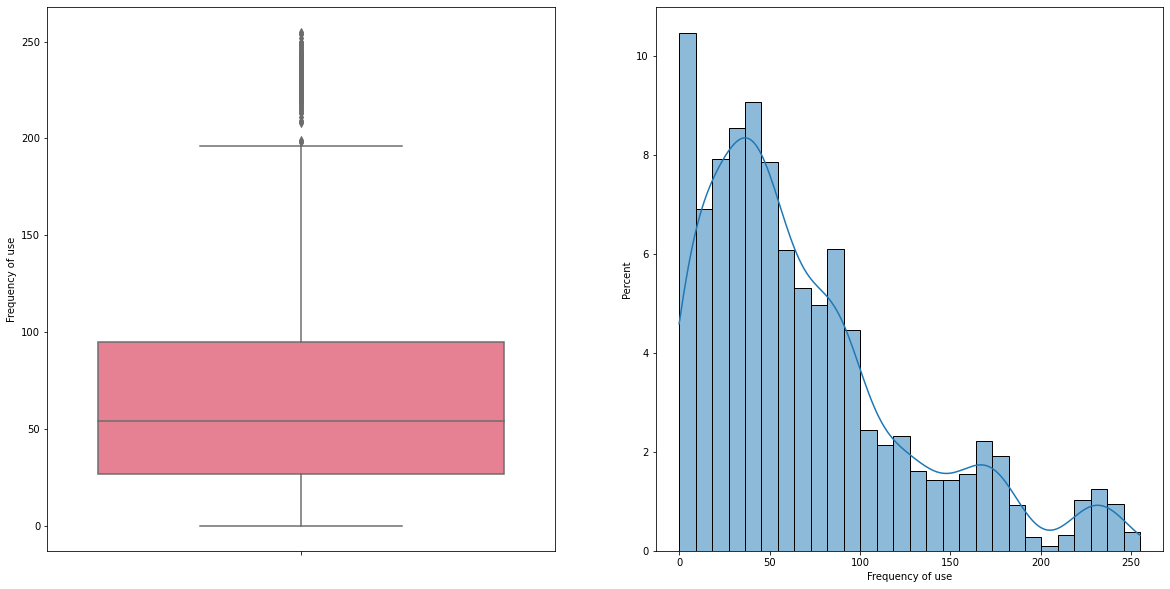

In [15]:
# Frequency of use 시각화 (numerical)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
sns.boxplot(y = df['Frequency of use'], ax=axs[0], palette = palette)
sns.histplot(df['Frequency of use'], kde = True, stat = 'percent', ax=axs[1], palette = palette)
plt.show()

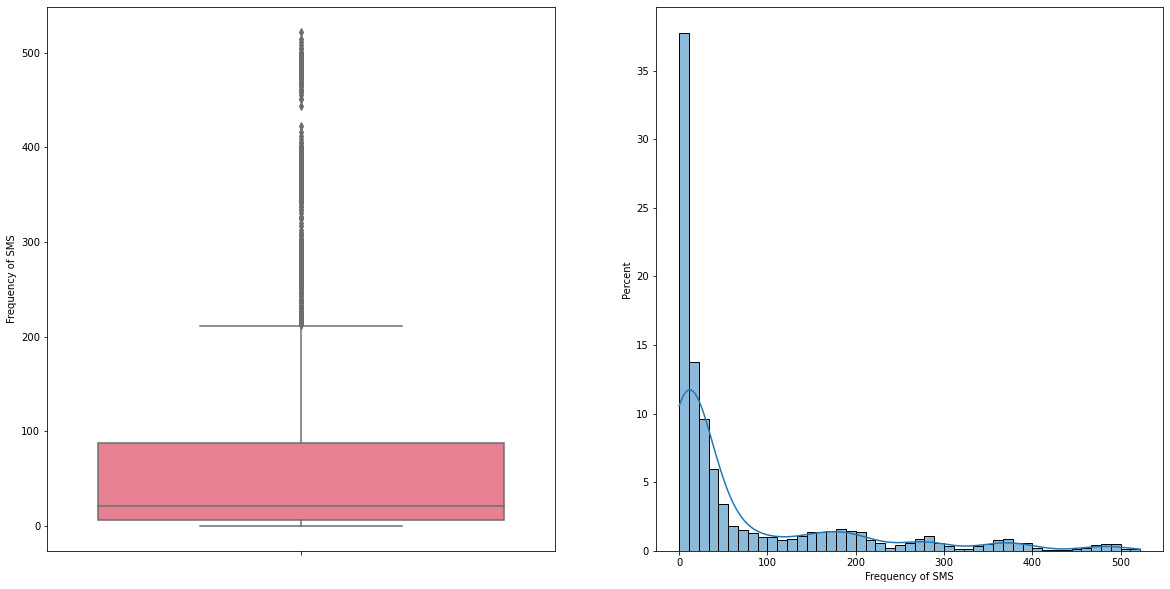

In [16]:
# Frequency of SMS 시각화 (numerical)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
sns.boxplot(y = df['Frequency of SMS'], ax=axs[0], palette = palette)
sns.histplot(df['Frequency of SMS'], kde = True, stat = 'percent', ax=axs[1], palette = palette)
plt.show()

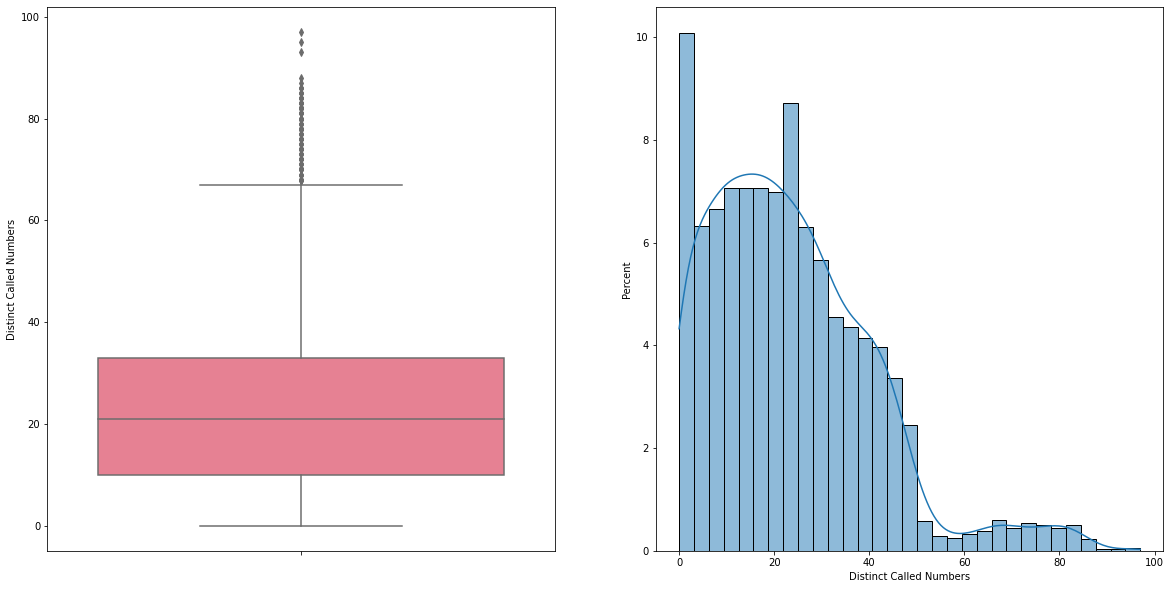

In [17]:
# Distinct Called Numbers 시각화 (numerical)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
sns.boxplot(y = df['Distinct Called Numbers'], ax=axs[0], palette = palette)
sns.histplot(df['Distinct Called Numbers'], kde = True, stat = 'percent', ax=axs[1], palette = palette)
plt.show()

/Users/yrlee/miniforge3/envs/tf/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


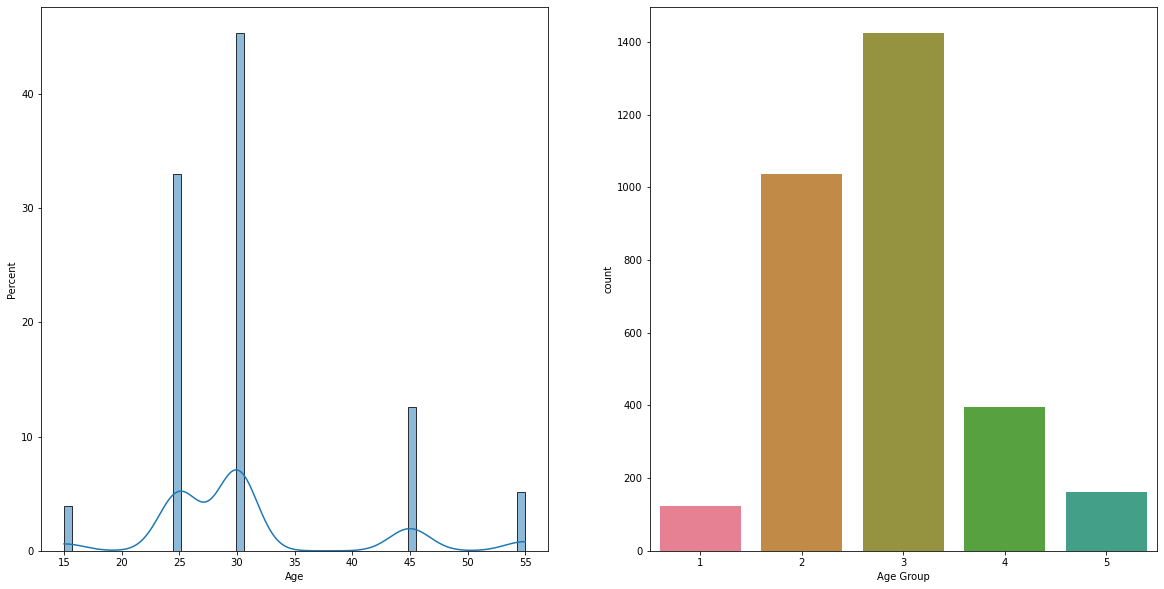

In [18]:
# Age / Age Group 시각화 (numerical)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
sns.histplot(df['Age'], kde = True, stat = 'percent', ax=axs[0], palette = palette)
sns.countplot(df['Age Group'], ax=axs[1], palette = palette)
plt.show()

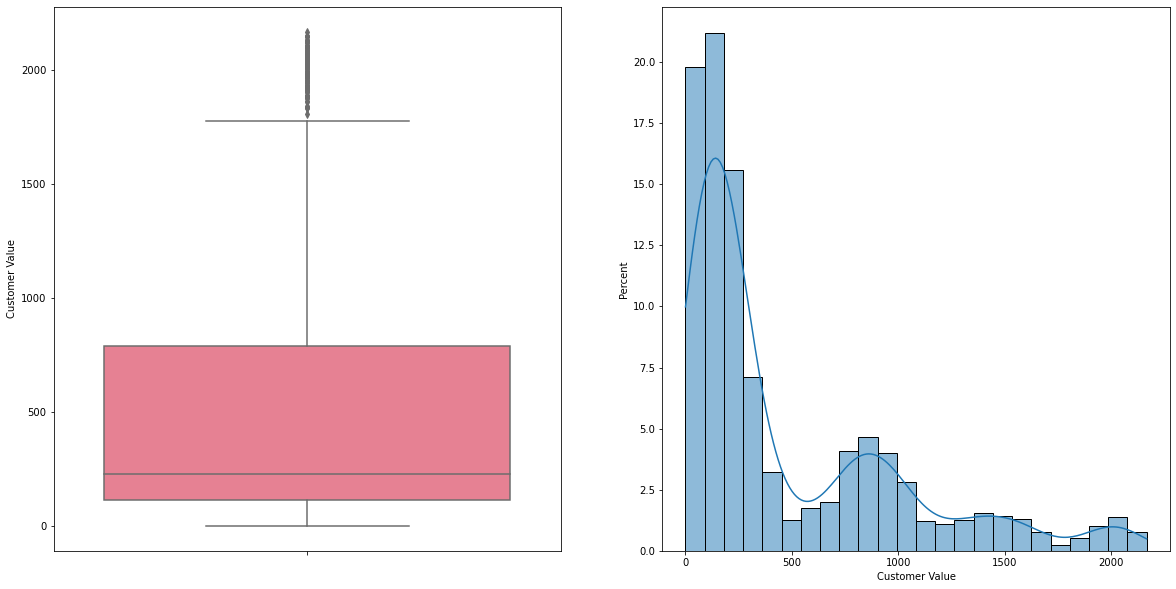

In [19]:
# Customer Value 시각화 (numerical)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
sns.boxplot(y = df['Customer Value'], ax=axs[0], palette = palette)
sns.histplot(df['Customer Value'], kde = True, stat = 'percent', ax=axs[1], palette = palette)
plt.show()

In [20]:
#VIF / 10 이상은 유의미하지 않을 수 있음 

y = df['Churn']
X = df.drop(['Churn'], axis=1)

vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif_data

,feature,VIF
0,Call Failure,6.050645
1,Complains,1.249507
2,Subscription Length,15.176198
3,Charge Amount,4.072552
4,Seconds of Use,48.678331
5,Frequency of use,46.627292
6,Frequency of SMS,58.654443
7,Distinct Called Numbers,6.971451
8,Age Group,155.605362
9,Tariff Plan,19.744892


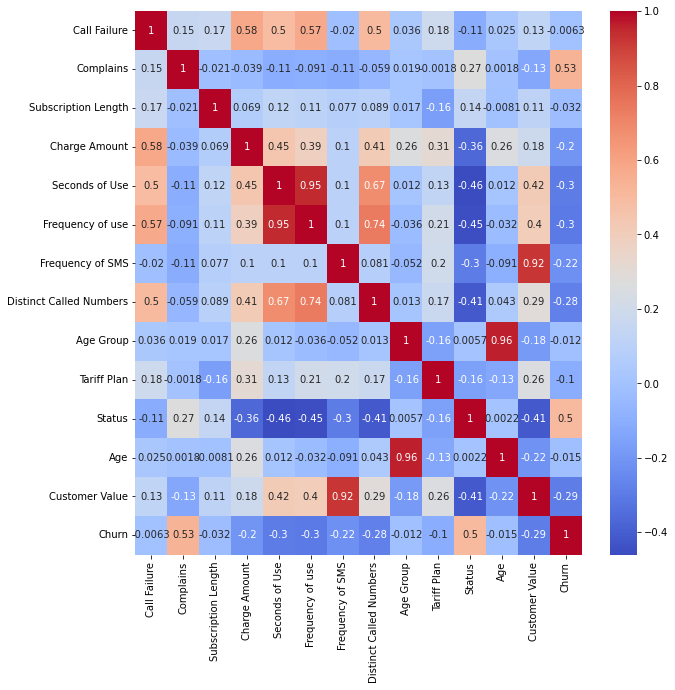

In [21]:
co = df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(co, annot=True, cmap='coolwarm')
plt.show()

In [22]:
#VIF / 10 이상은 유의미하지 않을 수 있음 

y = df['Churn']
X4 = df.drop(['Subscription Length', 'Seconds of Use', 'Distinct Called Numbers', 'Age', 'Churn', 'Customer Value', 'Tariff Plan', 'Status'], axis=1)

df_vif = pd.DataFrame(X4)
df_vif['Churn'] = df['Churn']

vif_data2 = pd.DataFrame()
vif_data2['feature'] = X4.columns
vif_data2['VIF'] = [variance_inflation_factor(X4.values, i) for i in range(len(X4.columns))]
vif_data2

,feature,VIF
0,Call Failure,4.563334
1,Complains,1.566923
2,Charge Amount,2.347521
3,Frequency of use,3.910593
4,Frequency of SMS,1.429621
5,Age Group,3.029643
6,Churn,1.870039


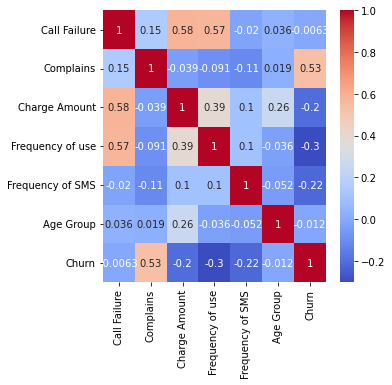

In [23]:
co2 = df_vif.corr()
plt.figure(figsize=(5, 5))
sns.heatmap(co2, annot=True, cmap='coolwarm')
plt.show()

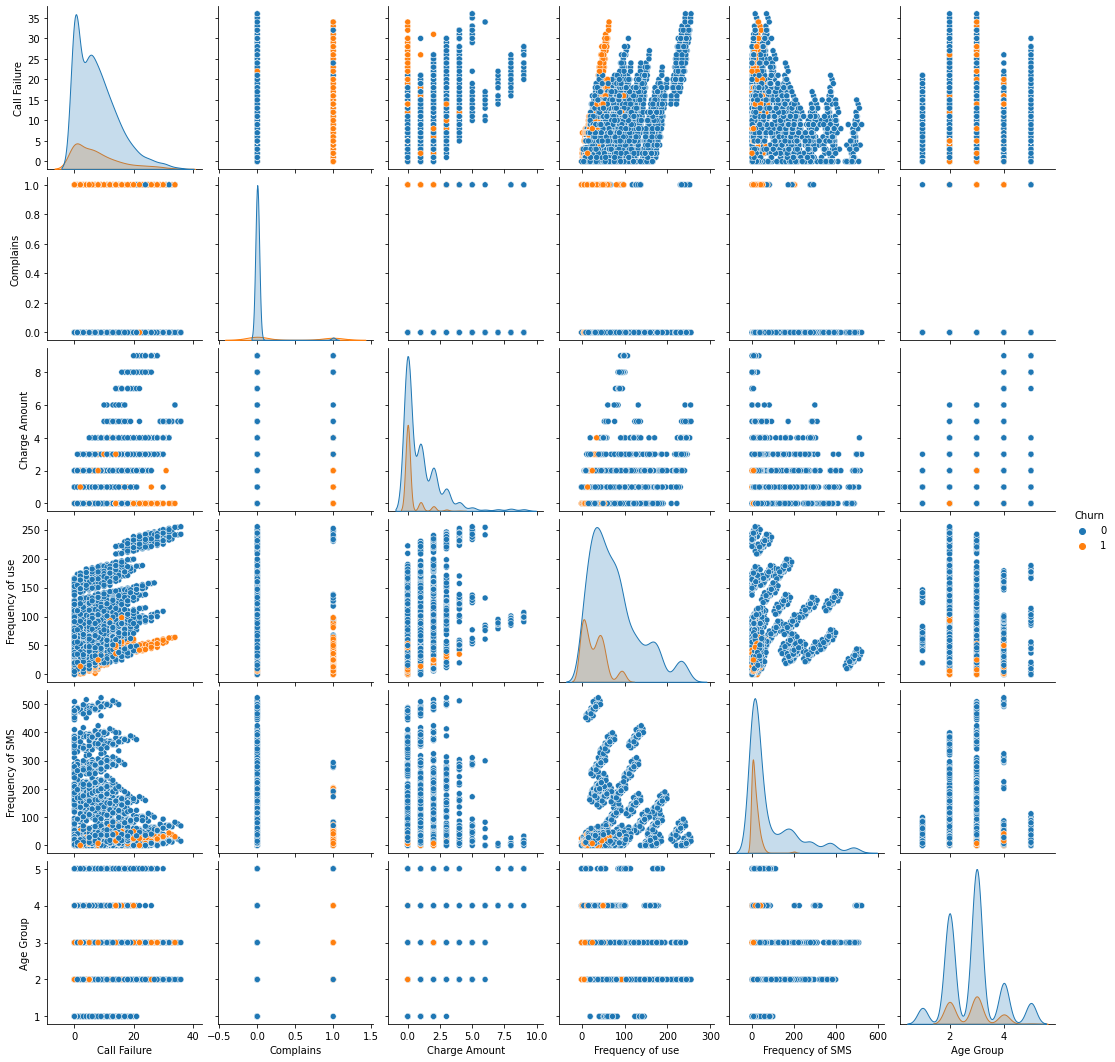

In [24]:
# VIF가 10 이하인 feature만 사용하여 시각화

sns.pairplot(df_vif, hue='Churn')
plt.show()

In [25]:
def calculate_log_likelihood(model, X, y):
    predicted_probs = model.predict_proba(X)[:, 1]
    log_likelihood = np.sum(y * np.log(predicted_probs) + (1 - y) * np.log(1 - predicted_probs))
    return log_likelihood

In [26]:
# model 1 가설로 생각한 Call Failure, Complains, Seconds of Use

y = df['Churn']
X = df[['Call Failure', 'Complains', 'Seconds of Use']]

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

In [27]:
# model 1 가설로 생각한 Call Failure, Complains, Seconds of Use

model1 = LogisticRegression()
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)

train_score1 = model1.score(X_train, y_train)
test_score1 = model1.score(X_test, y_test)

log_likelihood_model1_train = calculate_log_likelihood(model1, X_train, y_train)
print("Log Likelihood for Model 1:", log_likelihood_model1_train)

Log Likelihood for Model 1: -564.8132114788167


In [28]:
# model 2 모든 features을 X로 사용

y = df['Churn']
X2 = df.drop(['Churn'], axis=1)

scaler = StandardScaler()
X2 = scaler.fit_transform(X2)

X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size = 0.3, random_state = 100)

In [29]:
# model 2 모든 features을 X로 사용

model2 = LogisticRegression()
model2.fit(X2_train, y_train)
y_pred2 = model2.predict(X2_test)

train_score2 = model2.score(X2_train, y_train)
test_score2 = model2.score(X2_test, y_test)

log_likelihood_model2_train = calculate_log_likelihood(model2, X2_train, y_train)
print("Log Likelihood for Model 2:", log_likelihood_model2_train)

Log Likelihood for Model 2: -482.7194320714108


In [30]:
LR_test_statistic1 = -2 * (log_likelihood_model1_train - log_likelihood_model2_train)
df1 = model2.n_features_in_ - model1.n_features_in_
p_value1 = chi2.sf(LR_test_statistic1, df1)

print("LR Test Statistic:", LR_test_statistic1)
print("P-Value:", p_value1)
print("성능: Model 2 > Model 1")

LR Test Statistic: 164.18755881481184
P-Value: 4.421511709443413e-30
성능: Model 2 > Model 1


In [31]:
# model 3 X 전체 features들 pca

pca = PCA(n_components=13) 
principalComponents = pca.fit_transform(X2)
pc_columns = ["PC" + str(i) for i in range(1, pca.n_components_ + 1)]
principalDf = pd.DataFrame(data=principalComponents, columns=pc_columns)
principalDf.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
0,-0.416244,0.248207,-0.297978,-0.264882,-0.811858,0.228953,-0.110578,0.531225,-0.314858,0.775614,-0.201520,0.100639,0.016592
1,-2.771824,-0.844208,-0.748856,-0.734467,-0.101779,0.993067,0.362334,-0.098306,-0.148101,-0.650535,0.160559,-0.091700,0.051787
2,0.940775,-1.624869,2.264889,-1.370166,0.493997,-0.420025,-0.268364,-0.511451,0.539571,0.838145,-0.129172,-0.026656,0.018984
3,0.062850,-1.840589,-2.026053,-0.190994,-1.007781,0.411917,-0.648048,0.484727,0.659691,0.375712,0.157838,0.149243,0.107804
4,-0.590114,-2.007667,-1.678130,-0.025121,-1.179568,0.425003,-0.550220,0.968618,0.744032,-0.067393,0.079928,-0.182459,0.103403


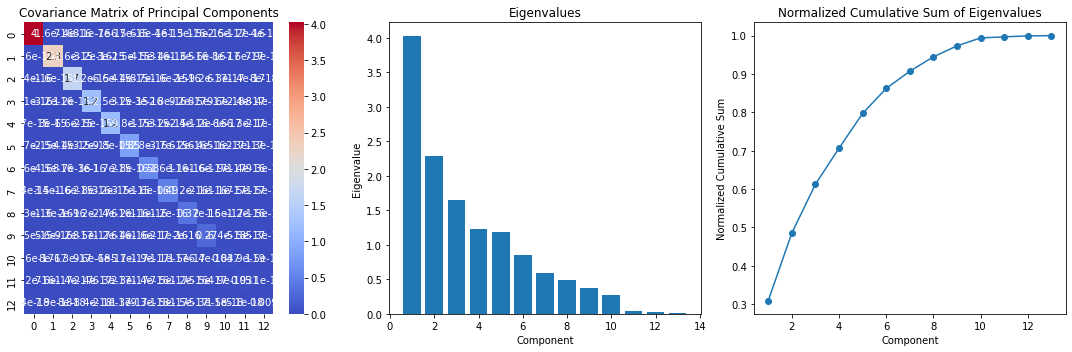

In [32]:
eigenvectors = pca.components_
eigenvalues = pca.explained_variance_

cov_matrix = np.cov(principalComponents.T)

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
sns.heatmap(cov_matrix, annot=True, cmap='coolwarm', ax=axs[0])
axs[0].set_title('Covariance Matrix of Principal Components')


axs[1].bar(range(1,len(eigenvalues)+1), eigenvalues)
axs[1].set_xlabel('Component')
axs[1].set_ylabel('Eigenvalue')
axs[1].set_title('Eigenvalues')

cumulative_sum = np.cumsum(eigenvalues)
normalized_cumulative_sum = cumulative_sum / np.sum(eigenvalues)

axs[2].plot(range(1, len(eigenvalues) + 1), normalized_cumulative_sum, marker='o')
axs[2].set_xlabel('Component')
axs[2].set_ylabel('Normalized Cumulative Sum')
axs[2].set_title('Normalized Cumulative Sum of Eigenvalues')

plt.tight_layout()
plt.show()

In [33]:
# model 3 X 전체 features들 pca하여 X로 사용
principalDf_regr = principalDf.loc[:, ['PC1', 'PC2', 'PC3', 'PC4']]

X3_train, X3_test, y_train, y_test = train_test_split(principalDf_regr, y, test_size = 0.3, random_state = 100)

In [34]:
#model 3 X 전체 features들 pca하여 X로 사용

model3 = LogisticRegression()
model3.fit(X3_train, y_train)
y_pred3 = model3.predict(X3_test)

train_score3 = model3.score(X3_train, y_train)
test_score3 = model3.score(X3_test, y_test)

log_likelihood_model3_train = calculate_log_likelihood(model3, X3_train, y_train)
print("Log Likelihood for Model 3:", log_likelihood_model3_train)

Log Likelihood for Model 3: -528.955159362062


In [35]:
LR_test_statistic2 = -2 * (log_likelihood_model3_train - log_likelihood_model2_train)
df2 = model2.n_features_in_ - model3.n_features_in_
p_value2 = chi2.sf(LR_test_statistic2, df2)

print("LR Test Statistic:", LR_test_statistic2)
print("P-Value:", p_value2)
print("성능: Model 2 > Model 3")

LR Test Statistic: 92.4714545813024
P-Value: 5.190994677263797e-16
성능: Model 2 > Model 3


In [36]:
# model 4 X VIF < 10 이하인 features만 X로 사용

y = df_vif['Churn']
X4 = df_vif.drop(['Churn'], axis=1)
              
scaler = StandardScaler()
X4 = scaler.fit_transform(X4)

X4_train, X4_test, y_train, y_test = train_test_split(X4, y, test_size = 0.3, random_state = 100)

In [37]:
# model 4 X VIF < 10 이하인 features만 X로 사용

model4 = LogisticRegression()
model4.fit(X4_train, y_train)
y_pred4 = model4.predict(X4_test)

train_score4 = model4.score(X4_train, y_train)
test_score4 = model4.score(X4_test, y_test)

log_likelihood_model4_train = calculate_log_likelihood(model4, X4_train, y_train)
print("Log Likelihood for Model 4:", log_likelihood_model4_train)

Log Likelihood for Model 4: -498.1581343953569


In [38]:
LR_test_statistic3 = -2 * (log_likelihood_model4_train - log_likelihood_model2_train)
df3 = model2.n_features_in_ - model4.n_features_in_
p_value3 = chi2.sf(LR_test_statistic3, df3)

print("LR Test Statistic:", LR_test_statistic3)
print("P-Value:", p_value3)
print("성능: Model 2 > Model 4")

LR Test Statistic: 30.877404647892263
P-Value: 6.549544637512395e-05
성능: Model 2 > Model 4


In [39]:
print("Model2 Logistic Regression train, test score : {0:.5f}, {1:.5f}" .format(train_score1, test_score1))
print("Model4 Logistic Regression train, test score : {0:.5f}, {1:.5f}" .format(train_score2, test_score2))
print("Model2 Logistic Regression train, test score : {0:.5f}, {1:.5f}" .format(train_score3, test_score3))
print("Model4 Logistic Regression train, test score : {0:.5f}, {1:.5f}" .format(train_score4, test_score4))

Model2 Logistic Regression train, test score : 0.90455, 0.88971
Model4 Logistic Regression train, test score : 0.90182, 0.88759
Model2 Logistic Regression train, test score : 0.89136, 0.88653
Model4 Logistic Regression train, test score : 0.90909, 0.88971


모델 2 Precision, recall, f1 score : 0.86842, 0.40741, 0.55462
모델 4 Precision, recall, f1 score : 0.91429, 0.39506, 0.55172


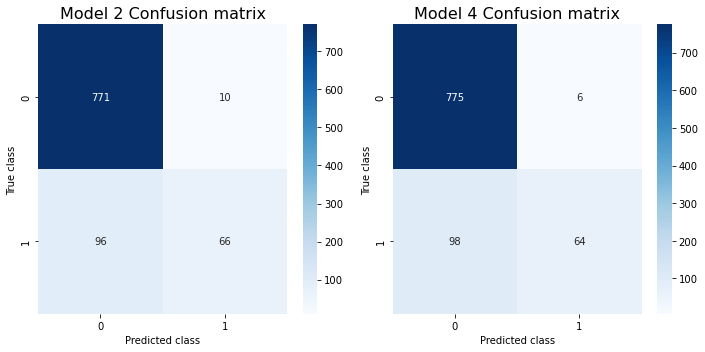

In [40]:
fig = plt.figure(figsize=(10, 5))
gs = GridSpec(1, 2, figure=fig)

ax1 = fig.add_subplot(gs[0, 0]) 
ax2 = fig.add_subplot(gs[0, 1])

cf2 = confusion_matrix(y_test, y_pred2)
cf4 = confusion_matrix(y_test, y_pred4)

sns.heatmap(cf2, annot=True, annot_kws = {'size' : 10}, fmt='d',
                cmap = 'Blues', ax = ax1)
sns.heatmap(cf4, annot=True, annot_kws = {'size' : 10}, fmt='d',
                cmap = 'Blues', ax = ax2)

ax1.set_title('Model 2 Confusion matrix', fontsize=16)  
ax2.set_title('Model 4 Confusion matrix', fontsize=16) 

print("모델 2 Precision, recall, f1 score : {0:.5f}, {1:.5f}, {2:.5f}".format(precision_score(y_test, y_pred2), recall_score(y_test, y_pred2), 
     f1_score(y_test, y_pred2)))
print("모델 4 Precision, recall, f1 score : {0:.5f}, {1:.5f}, {2:.5f}".format(precision_score(y_test, y_pred4), recall_score(y_test, y_pred4), 
     f1_score(y_test, y_pred4)))

ax1.set_xlabel('Predicted class')
ax1.set_ylabel('True class')

ax2.set_xlabel('Predicted class')
ax2.set_ylabel('True class')

fig.tight_layout()
plt.show()

In [41]:
df_churn_0 = df[df['Churn'] == 0].sample(n = len(df[df['Churn'] == 1]),
                            random_state = 100)
df_churn_1 = df[df['Churn'] == 1]

df_same = pd.concat([df_churn_0, df_churn_1])

ys = df_same['Churn']
Xs = df_same.drop(['Subscription Length', 'Seconds of Use', 'Distinct Called Numbers', 'Age', 'Churn', 'Customer Value', 'Tariff Plan', 'Status'], axis=1)

scaler = StandardScaler()
Xs = scaler.fit_transform(Xs)

In [42]:
y_pred_sample = model4.predict(Xs)

score_sample = model4.score(Xs, ys)

log_likelihood_model4_sample = calculate_log_likelihood(model4, Xs, ys)
print("Log Likelihood for Model 4 data sampling :", log_likelihood_model4_sample)

Log Likelihood for Model 4 data sampling : -853.6103244769533


In [43]:
print("Model4 Logistic Regression data sampling score : {0:.5f}" .format(score_sample))

Model4 Logistic Regression data sampling score : 0.62323


모델 4 (default data) Precision, recall, f1 score : 0.91429, 0.39506, 0.55172
모델 4 (data sampling) Precision, recall, f1 score : 1.00000, 0.24646, 0.39546


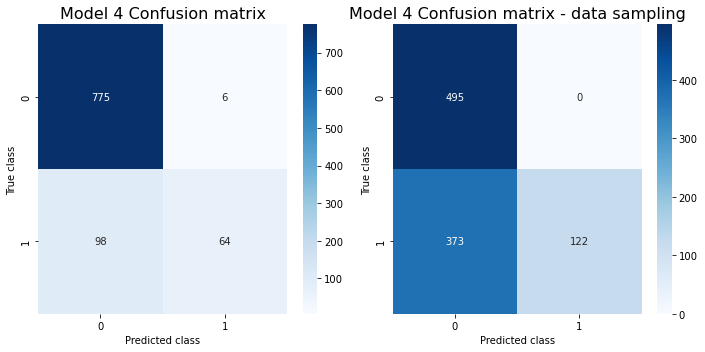

In [44]:
fig = plt.figure(figsize=(10, 5))
gs = GridSpec(1, 2, figure=fig)

ax1 = fig.add_subplot(gs[0, 0]) 
ax2 = fig.add_subplot(gs[0, 1])

cf4_sam = confusion_matrix(ys, y_pred_sample)

sns.heatmap(cf4, annot=True, annot_kws = {'size' : 10}, fmt='d', 
                cmap = 'Blues', ax = ax1)
sns.heatmap(cf4_sam, annot=True, annot_kws = {'size' : 10}, fmt='d',
                cmap = 'Blues', ax = ax2)

ax1.set_title('Model 4 Confusion matrix', fontsize=16) 
ax2.set_title('Model 4 Confusion matrix - data sampling', fontsize=16)  

print("모델 4 (default data) Precision, recall, f1 score : {0:.5f}, {1:.5f}, {2:.5f}".format(precision_score(y_test, y_pred4), recall_score(y_test, y_pred4), 
     f1_score(y_test, y_pred4)))
print("모델 4 (data sampling) Precision, recall, f1 score : {0:.5f}, {1:.5f}, {2:.5f}".format(precision_score(ys, y_pred_sample), recall_score(ys, y_pred_sample), 
     f1_score(ys, y_pred_sample)))

ax1.set_xlabel('Predicted class')
ax1.set_ylabel('True class')

ax2.set_xlabel('Predicted class')
ax2.set_ylabel('True class')

fig.tight_layout()
plt.show()